# Matplotlib
___

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <a list of 10 Patch objects>)

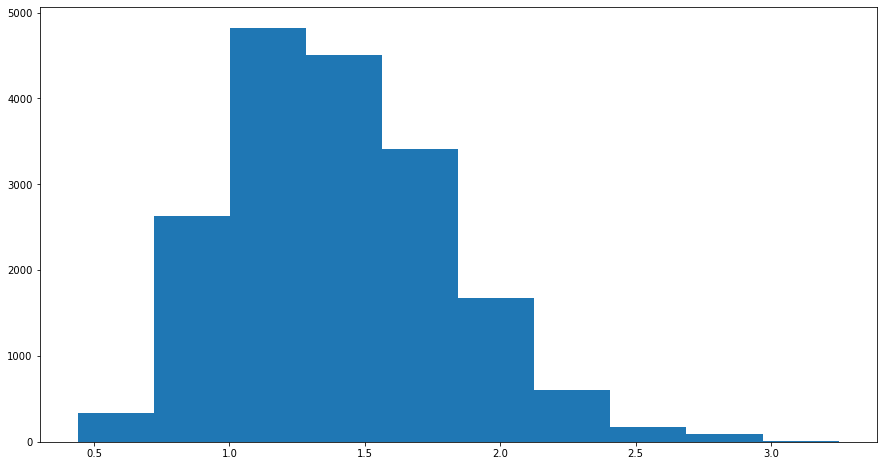

In [4]:
plt.figure(figsize=(15,8))
plt.hist(df.AveragePrice)

In [5]:
## agrupando os dados necessários

data = (
    
    df.loc[:,['year','AveragePrice']]
    .groupby('year')
    .mean()

)

In [6]:
## criando o array de valores necessarios para o tamanho do plt.bar

tamanho = data.values.flatten()
tamanho

array([1.37559038, 1.3386396 , 1.51512758, 1.34753086])

In [7]:
## criando a lista de valores necessarios para os indices do plt.bar

x = list(data.index)
x

[2015, 2016, 2017, 2018]

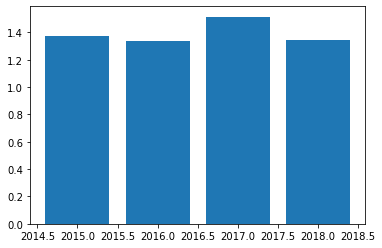

In [8]:
## criando um plt.bar com tamanho e x

plt.figure()
plt.bar(x = x, height= tamanho)
plt.show()

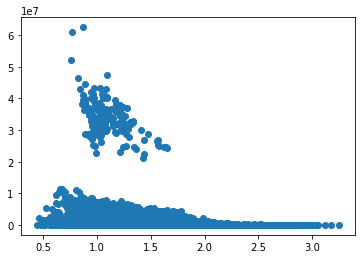

In [9]:
## criando um scatterplot com AvaragePrice

plt.figure()
plt.scatter(x=df['AveragePrice'],y=df['Total Volume'])
plt.show()

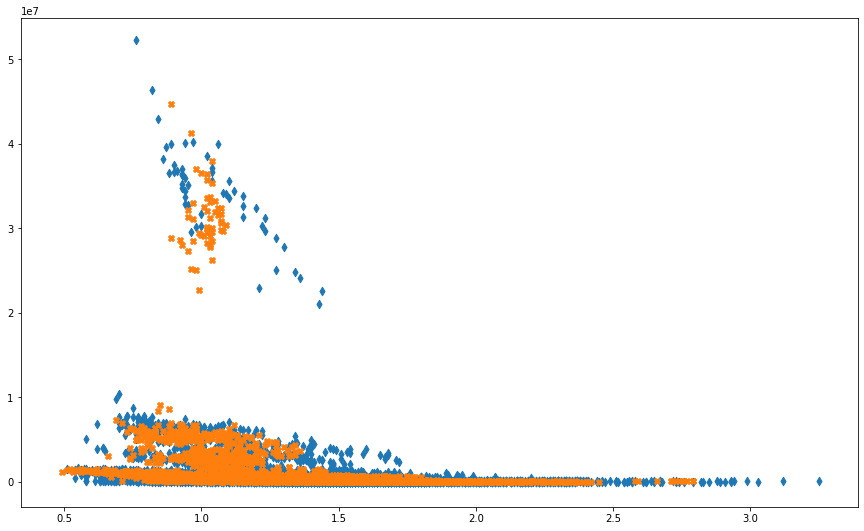

In [10]:
## adicionando dois dados num só grafico, adicionando cor, adicionando marcadores

plt.figure(figsize=(15,9))
plt.scatter(x = df[df.year == 2016].AveragePrice, y = df[df.year == 2016]['Total Volume'], 
            c = 'tab:blue' , marker = 'd' )
plt.scatter(x = df[df.year == 2015].AveragePrice, y = df[df.year == 2015]['Total Volume'], 
            c = 'tab:orange' , marker = 'X' )
plt.show()

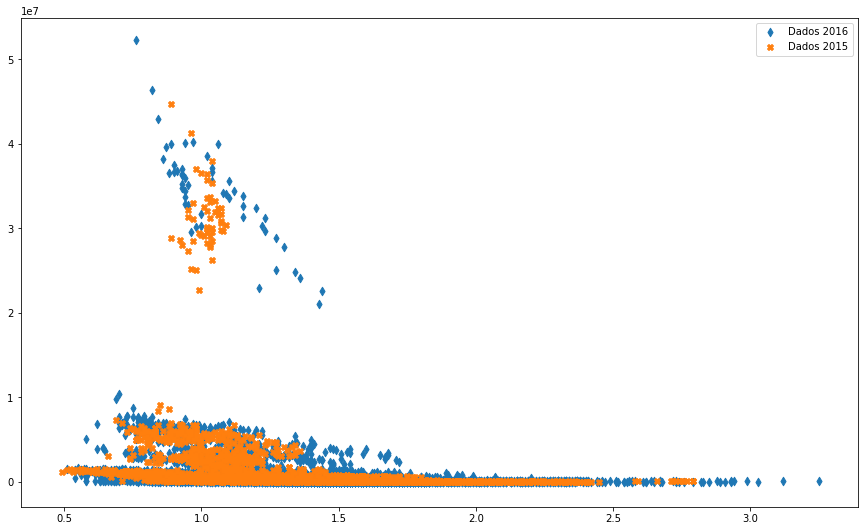

In [11]:
## adicionando legendas

plt.figure(figsize=(15,9))
plt.scatter(x = df[df.year == 2016].AveragePrice, y = df[df.year == 2016]['Total Volume'], 
            c = 'tab:blue' , marker = 'd' , label='Dados 2016')
plt.scatter(x = df[df.year == 2015].AveragePrice, y = df[df.year == 2015]['Total Volume'], 
            c = 'tab:orange' , marker = 'X', label='Dados 2015')

plt.legend()
plt.show()

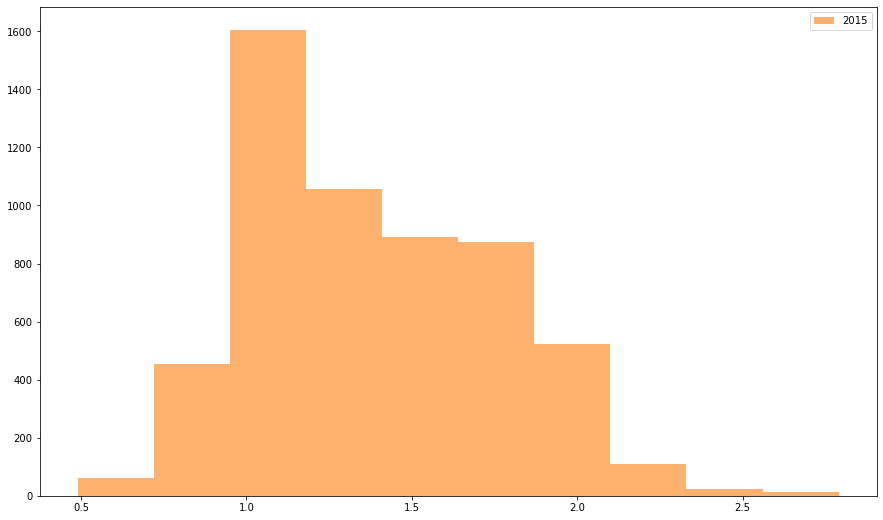

In [12]:
## criando um histograma

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.legend()
plt.show()

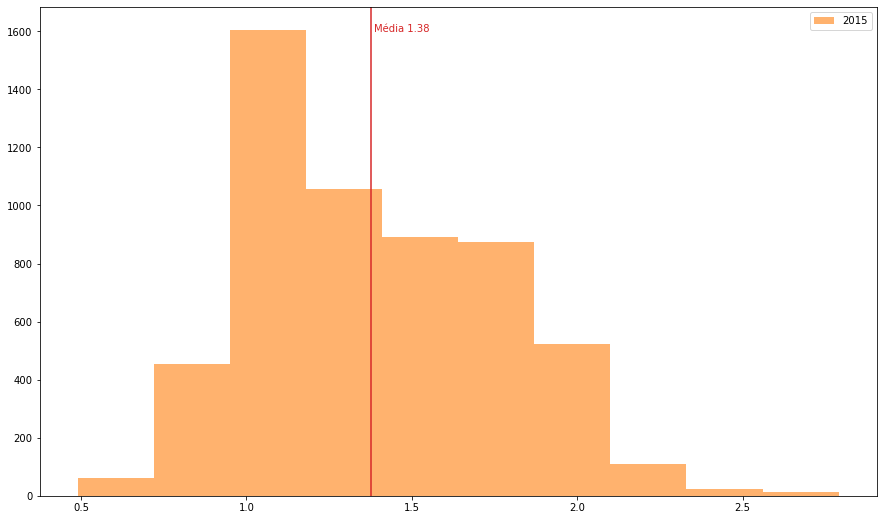

In [13]:
## encontrado a media dos valores

media = df[df['year'] == 2015]['AveragePrice'].mean()

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.axvline(x = media ,color='tab:red')
plt.text(x =  media + 0.01, y = 1600, s = f'Média {round(media,2)}', fontdict = {'color':'tab:red'})

plt.legend()
plt.show()

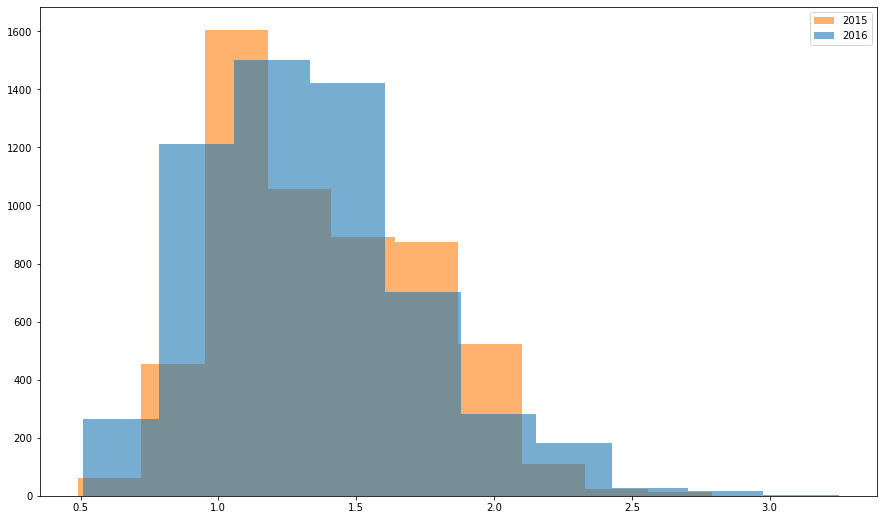

In [14]:
## criando mais de um histograma na mesma figura

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.hist(x = df[df['year'] == 2016]['AveragePrice'],color='tab:blue',alpha=0.6,label='2016')
plt.legend()
plt.show()

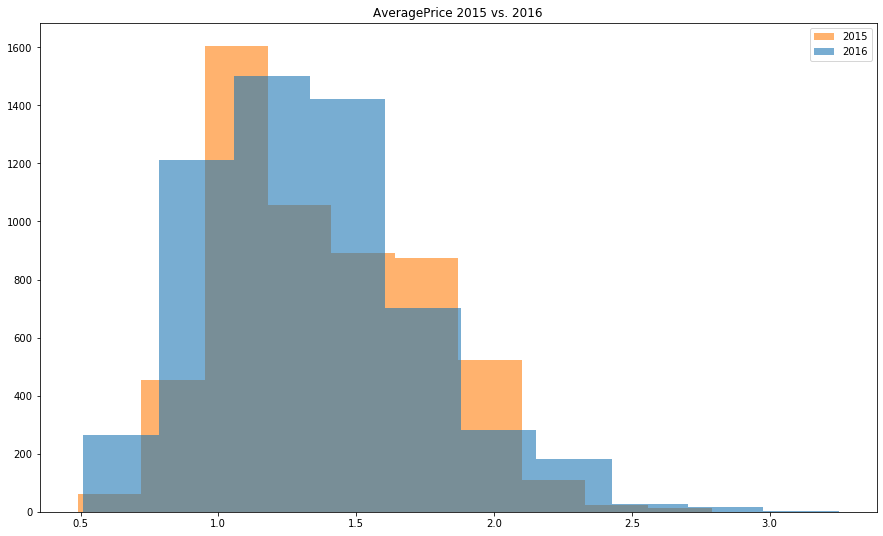

In [15]:
## gerando o gráfico acima com título

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.hist(x = df[df['year'] == 2016]['AveragePrice'],color='tab:blue',alpha=0.6,label='2016')
plt.title('AveragePrice 2015 vs. 2016',fontdict={'color':'black'})
plt.legend()
plt.show()

In [16]:
## gerando os dados necessários para o próximo gráfico

dados = (


  df[['Date','Total Bags','year','region']]
  .query('year == 2015')
  .query("region == 'LasVegas'")
  .drop(['year','region'],axis=1)
  .assign(Date = lambda x: pd.to_datetime(x.Date,infer_datetime_format=True))
  .sort_values('Date')

)

print(dados.shape)
dados

(104, 2)


,Date,Total Bags
1143,2015-01-04,58638.68
10269,2015-01-04,457.12
10268,2015-01-11,33.33
1142,2015-01-11,37144.36
1141,2015-01-18,33175.55
...,...,...
10220,2015-12-13,509.14
1093,2015-12-20,54103.94
10219,2015-12-20,407.88
10218,2015-12-27,1015.50


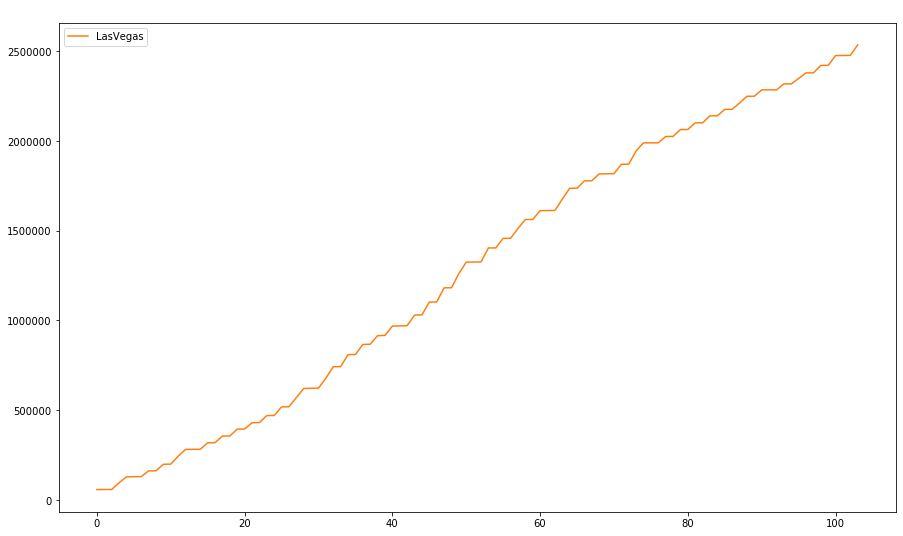

In [17]:
## gerando o gráfico de linhas com a soma cumulativa

soma_cumulativa = dados['Total Bags'].cumsum()

plt.figure(figsize=(15,9))
plt.plot(range(104),soma_cumulativa,color='tab:orange',label='LasVegas')
plt.title('AveragePrice 2015 vs. 2016',fontdict={'color':'white'})
plt.legend()
plt.show()

In [18]:
## definindo os dados de albany

dados_albany = (


  df[['Date','Total Bags','year','region']]
  .query('year == 2015')
  .query("region == 'Albany'")
  .drop(['year','region'],axis=1)
  .assign(Date = lambda x: pd.to_datetime(x.Date,infer_datetime_format=True))
  .sort_values('Date')


)

print(dados_albany.shape)
dados

(104, 2)


,Date,Total Bags
1143,2015-01-04,58638.68
10269,2015-01-04,457.12
10268,2015-01-11,33.33
1142,2015-01-11,37144.36
1141,2015-01-18,33175.55
...,...,...
10220,2015-12-13,509.14
1093,2015-12-20,54103.94
10219,2015-12-20,407.88
10218,2015-12-27,1015.50


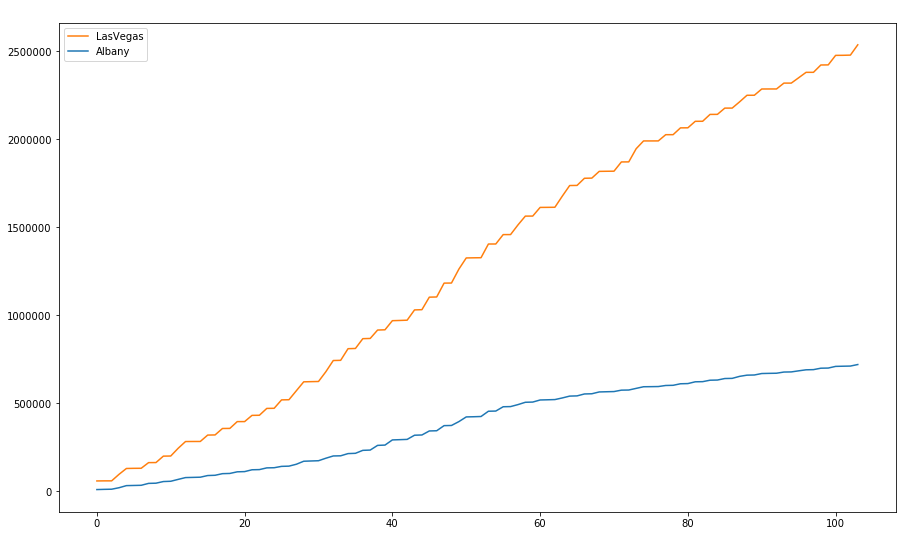

In [19]:
## gerando o gráfico de linhas com a soma cumulativa

soma_cumulativa = dados['Total Bags'].cumsum()
soma_cumulativa_albany = dados_albany['Total Bags'].cumsum()

plt.figure(figsize=(15,9))
plt.plot(range(104),soma_cumulativa,color='tab:orange',label='LasVegas')
plt.plot(range(104),soma_cumulativa_albany,color='tab:blue',label='Albany')
plt.title('Total Bags LasVegas vs Albany (2015)',fontdict={'color':'white'})
plt.legend()
plt.show()

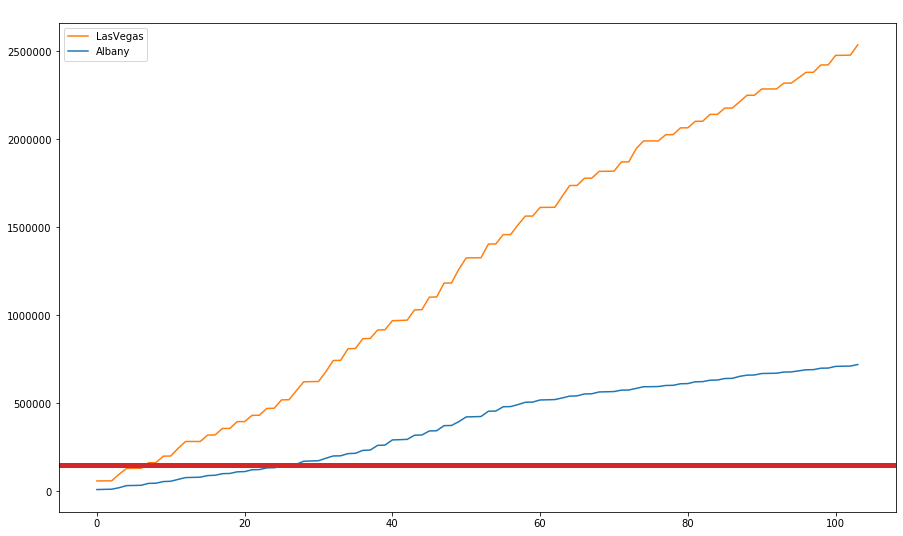

In [20]:
## adicionando uma linha horizontal no valor 150000

soma_cumulativa = dados['Total Bags'].cumsum()
soma_cumulativa_albany = dados_albany['Total Bags'].cumsum()

plt.figure(figsize=(15,9))
plt.plot(range(104),soma_cumulativa,color='tab:orange',label='LasVegas')
plt.plot(range(104),soma_cumulativa_albany,color='tab:blue',label='Albany')
plt.title('Total Bags LasVegas vs Albany (2015)',fontdict={'color':'white'})

plt.axhline(y=150000,color='tab:red',lw=5)

plt.legend()
plt.show()

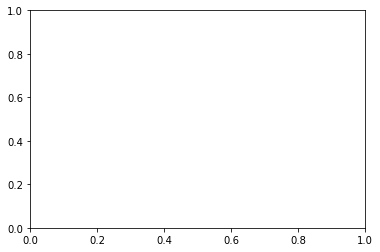

In [21]:
## criando um subplot vazio

plt.subplots()
plt.show()

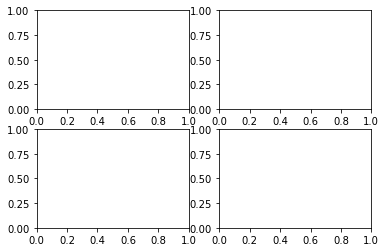

In [22]:
## criando um subplot com 4 axes (2 linhas e 2 colunas)

plt.subplots(2,2)
plt.show()

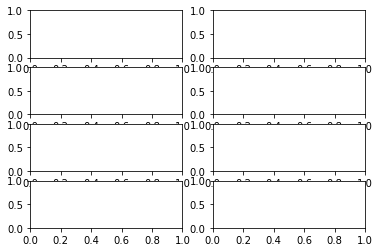

In [23]:
## guardando os retornos em varíaveis que podemos acessar e controlar

f, ax = plt.subplots(4,2)
plt.show()

In [24]:
## verificando o tipo de f e ax

print(type(f))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>


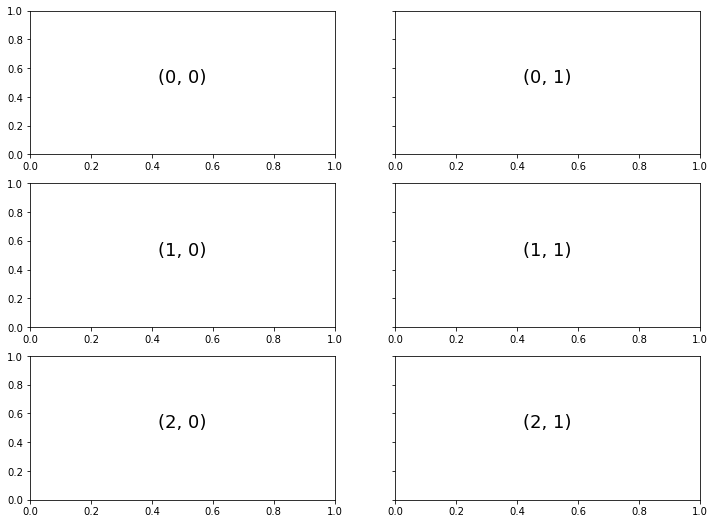

In [25]:
## acessando os gráficos e adicionando os textos

f, ax = plt.subplots(3,2,figsize=(12,9),sharey=True)


for i in range(3):
  for j in range(2):
    ax[i,j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')


plt.show()

In [26]:
## definindo os dados que vamos usar
subplot_data = df[['AveragePrice','year']]
subplot_data

,AveragePrice,year
0,1.33,2015
1,1.35,2015
2,0.93,2015
3,1.08,2015
4,1.28,2015
...,...,...
18244,1.63,2018
18245,1.71,2018
18246,1.87,2018
18247,1.93,2018


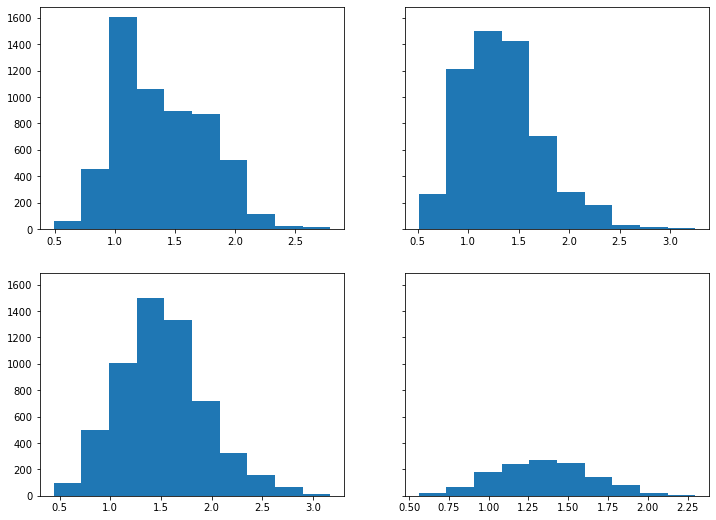

In [27]:
## criando os gráficos em cada um dos eixos

f, ax = plt.subplots(2,2,figsize=(12,9),sharey=True)

ax[0,0].hist(subplot_data.query('year == 2015').AveragePrice)
ax[0,1].hist(subplot_data.query('year == 2016').AveragePrice)
ax[1,0].hist(subplot_data.query('year == 2017').AveragePrice)
ax[1,1].hist(subplot_data.query('year == 2018').AveragePrice)

plt.show()

# Seaborn
___

In [37]:
dados = df[['year','AveragePrice']]

In [40]:
dados.head()

,year,AveragePrice
0,2015,1.33
1,2015,1.35
2,2015,0.93
3,2015,1.08
4,2015,1.28


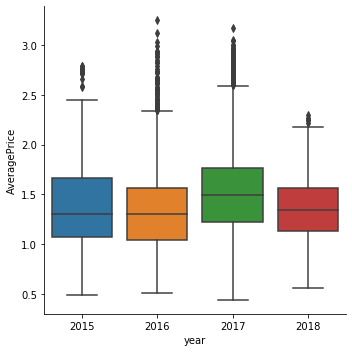

In [45]:
## criando um boxplot

sns.catplot(x = 'year', y = 'AveragePrice', kind='box', data = dados)

catplot == categorical plot

In [55]:
dados18 = dados.query("year == 2018")
dados18

,year,AveragePrice
8478,2018,1.57
8479,2018,1.35
8480,2018,1.12
8481,2018,1.08
8482,2018,1.28
...,...,...
18244,2018,1.63
18245,2018,1.71
18246,2018,1.87
18247,2018,1.93


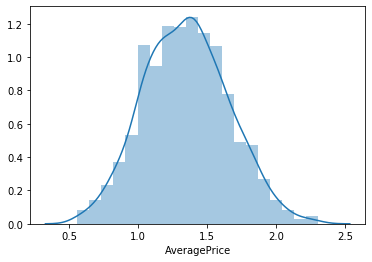

In [63]:
sns.distplot(dados18.AveragePrice, bins=20);

In [90]:
scatter_data = df[['Small Bags','Total Bags']]
scatter_data.head()

,Small Bags,Total Bags
0,8603.62,8696.87
1,9408.07,9505.56
2,8042.21,8145.35
3,5677.40,5811.16
4,5986.26,6183.95


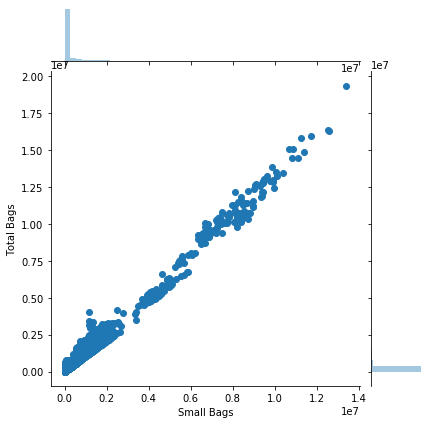

In [91]:
sns.jointplot(x='Small Bags', y='Total Bags', data = scatter_data)

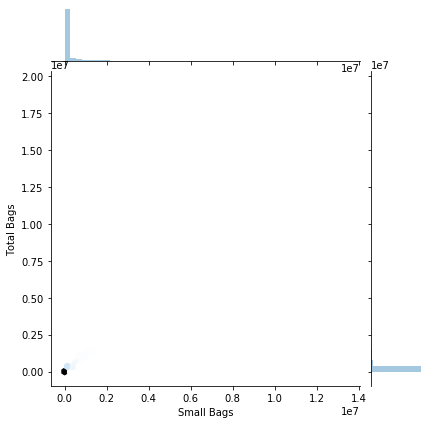

In [94]:
sns.jointplot(x='Small Bags', y='Total Bags', data = scatter_data, kind='hex')

In [95]:
data = pd.read_csv('data/houses_train.csv')

def get_data_desc():
    """Essa função devolve a descrição completa do dataset"""
    with open('data/data_description.txt','r') as file:
        for line in file:
            print(line)
            
def get_ascombe():
    x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
    y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
    y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

    datasets = {
        'I': (x, y1),
        'II': (x, y2),
        'III': (x, y3),
        'IV': (x4, y4)
    }
    
    return datasets

get_data_desc()

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [101]:
house_data = data[['LotArea','LotFrontage','PoolArea','GrLivArea','SalePrice']]

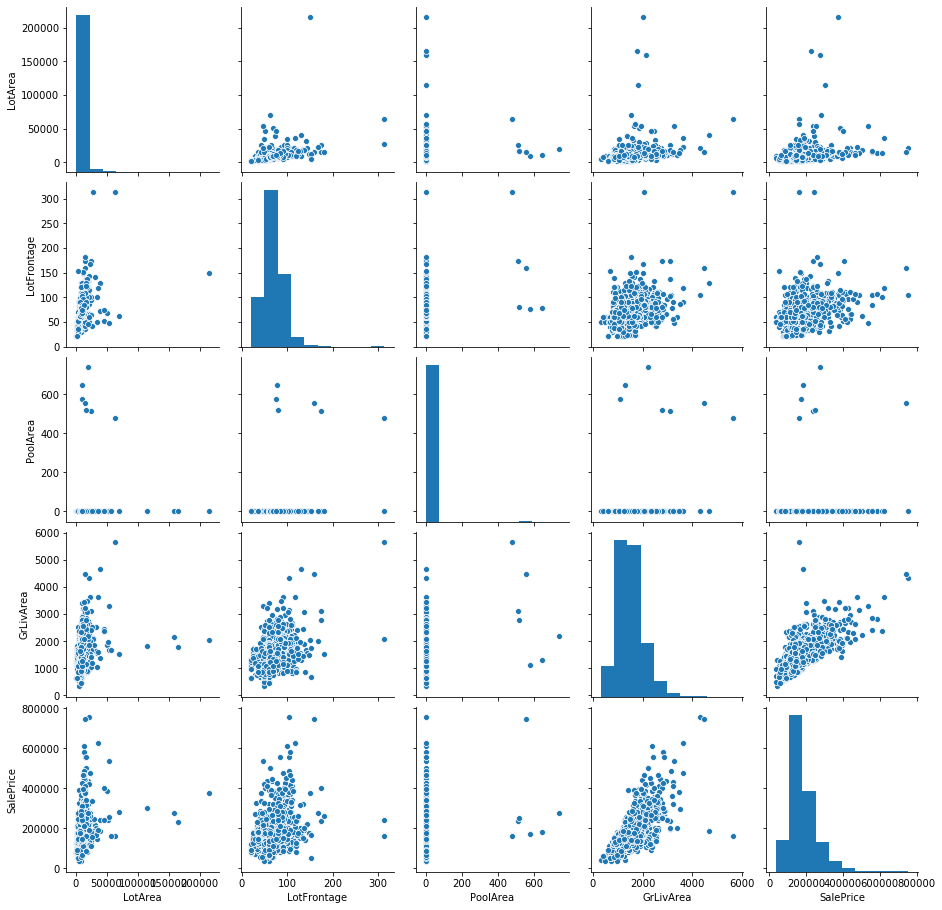

In [102]:
sns.pairplot(house_data)

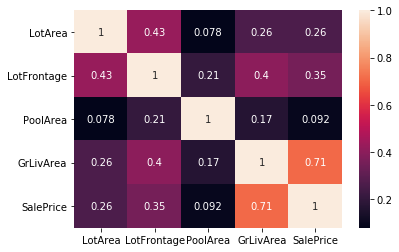

In [105]:
sns.heatmap(house_data.corr(),annot=True)

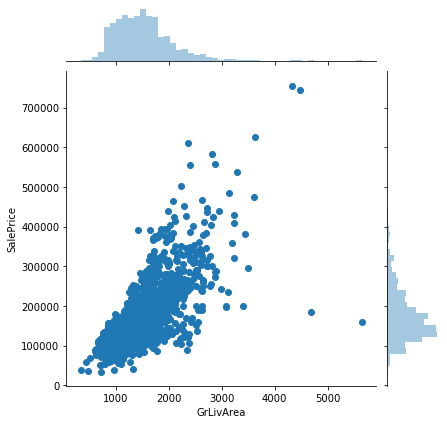

In [107]:
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = data[['SalePrice','GrLivArea']])

# Machine Learning
___

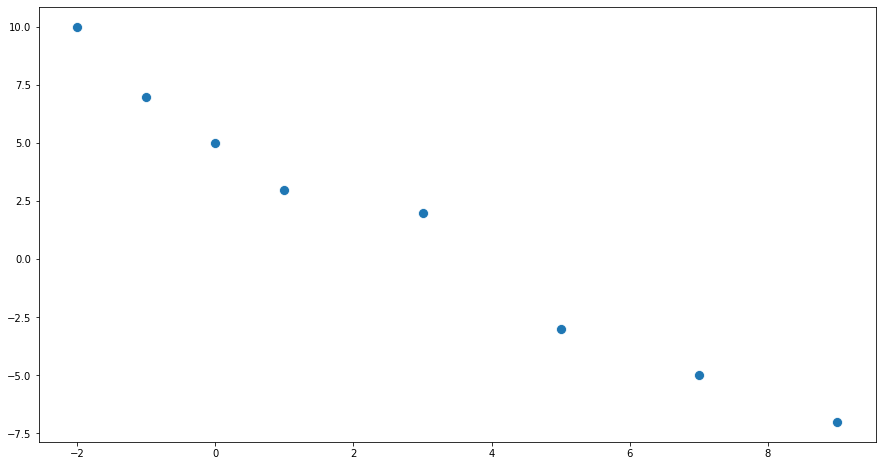

In [158]:
## verificando os dados para regressão linear simples

x = [-2,-1,0,1,3,5,7,9]
y = [10,7,5,3,2,-3,-5,-7]

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100)
plt.show()

In [159]:
## verificando a correlação

np.corrcoef(x,y)

array([[ 1.        , -0.98727131],
       [-0.98727131,  1.        ]])

In [160]:
## conferindo o resultado do google sheets

from sklearn.linear_model import LinearRegression

x = np.array([-2,-1,0,1,3,5,7,9]).reshape(-1,1)
y = [10,7,5,3,2,-3,-5,-7]

lr = LinearRegression()
lr.fit(x,y)
lr.coef_, lr.intercept_

(array([-1.49771689]), 5.6187214611872145)

In [161]:
## utilizando o predict

lr.predict([[1]])

array([4.12100457])

In [162]:
## gerando várias predições

for i in range(10):
  print(f'Predizendo para x={i} -- Resultado {lr.predict([[i]])}')

Predizendo para x=0 -- Resultado [5.61872146]
Predizendo para x=1 -- Resultado [4.12100457]
Predizendo para x=2 -- Resultado [2.62328767]
Predizendo para x=3 -- Resultado [1.12557078]
Predizendo para x=4 -- Resultado [-0.37214612]
Predizendo para x=5 -- Resultado [-1.86986301]
Predizendo para x=6 -- Resultado [-3.36757991]
Predizendo para x=7 -- Resultado [-4.8652968]
Predizendo para x=8 -- Resultado [-6.3630137]
Predizendo para x=9 -- Resultado [-7.86073059]


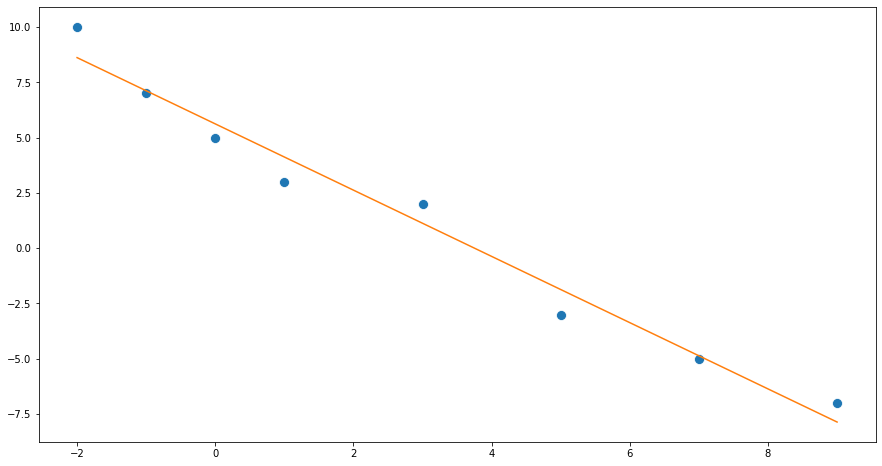

In [163]:
## verificando o modelo montado

x = [-2,-1,0,1,3,5,7,9]
y = [10,7,5,3,2,-3,-5,-7]

y_pred = [lr.predict([[x]])[0] for x in x]

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100)
sns.lineplot(x=x,y=y_pred,color='tab:orange')
plt.show()

In [165]:
## separar em treino e teste

x_test = np.array([0,1]).reshape(-1,1)
y_test = [5,3]

x_treino = np.array([-2,-1,3,5,7,9]).reshape(-1,1)
y_treino = [10,7,2,-3,-5,-7]

lr2 = LinearRegression()
lr2.fit(x_treino,y_treino)
lr2.coef_, lr.intercept_

(array([-1.54973822]), 5.6187214611872145)

In [167]:
## definido nosso_mean_squared_error

def nosso_mean_squared_error(y_real,y_pred): 
    return ((y_real - y_pred)**2).mean()

In [168]:
## calculando nosso_mean_squared_error

valores_reais_de_y = np.array([5,3])
valores_preditos_de_y = np.array([6.09075044, 4.54101222])

nosso_mean_squared_error(valores_reais_de_y,valores_preditos_de_y)

1.7822275922747606

In [169]:
## usando a API do sklearn

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,lr2.predict(x_test))

1.782227582699063

## CALIFORNIA HOUSING
___

## R2
___

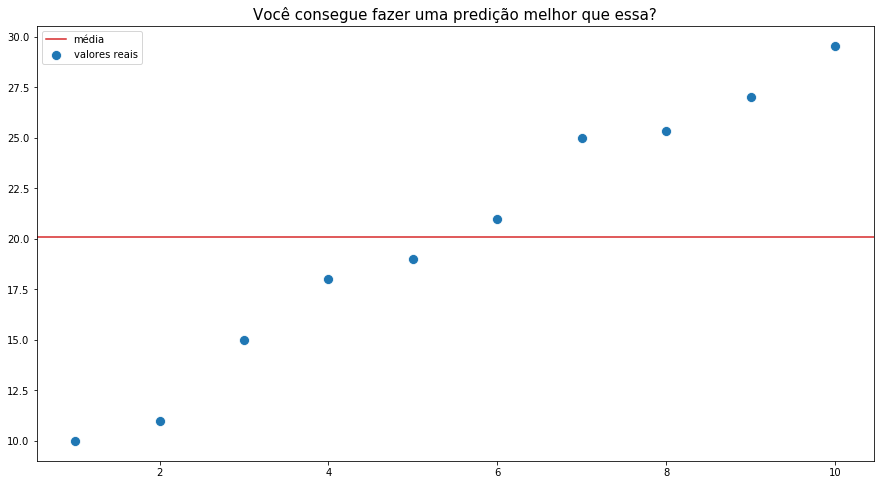

In [178]:
## demonstrando r2

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([10,11,15,18,19,21,25,25.33,27,29.55])

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='valores reais')
plt.axhline(y.mean(),color='tab:red',label='média')
plt.title('Você consegue fazer uma predição melhor que essa?',size=15)
plt.legend()
plt.show()

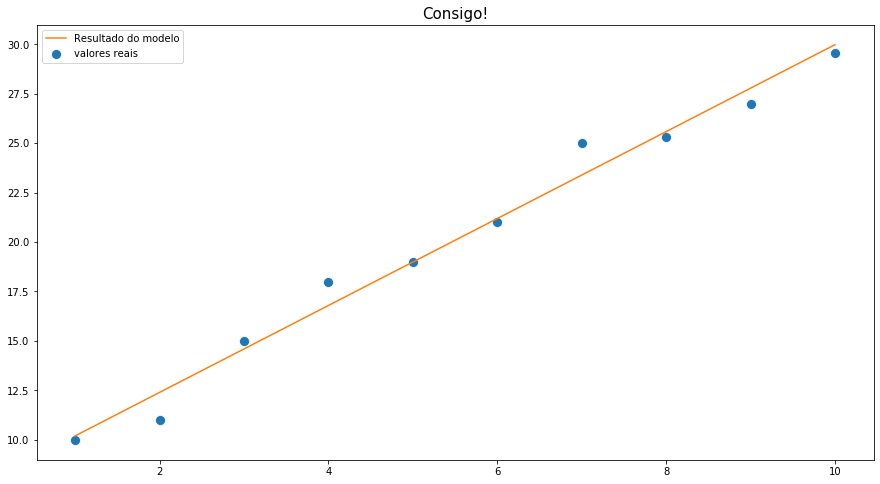

In [179]:
## valores reais
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([10,11,15,18,19,21,25,25.33,27,29.55])

## valor predito
y_pred = np.array([10.19890909, 12.39648485, 14.59406061, 16.79163636, 18.98921212,21.18678788, 23.38436364, 25.58193939, 27.77951515, 29.97709091])

## gráfico
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='valores reais')
sns.lineplot(x=x,y=y_pred,label='Resultado do modelo',color='tab:orange')
plt.title('Consigo!',size=15)
plt.legend()
plt.show()

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
df = data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
           'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]

In [173]:
df.columns = [x.lower() for x in df.columns]

In [174]:
df.shape

(1460, 10)

In [175]:
df.head()

,saleprice,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,1stflrsf,fullbath,totrmsabvgrd,yearbuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000


In [139]:
x = df.drop('saleprice',axis=1)
y = df.saleprice

In [140]:
x.shape

(1460, 9)

In [141]:
y.shape

(1460,)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [144]:
x_train.shape, x_test.shape

((1095, 9), (365, 9))

In [146]:
y_train.shape, y_test.shape

((1095,), (365,))

In [147]:
from sklearn.linear_model import LinearRegression

In [151]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
model.predict(x_test)

array([142630.00336516, 296361.87466562, 118400.68945032, 172943.13942637,
       291344.47862423,  54087.49097575, 210288.23386301, 170888.31277723,
        53317.87446995, 129659.93132225, 158021.7850639 , 108791.88724169,
        92978.30487789, 225059.46404297, 193196.76122419, 113241.81755663,
       214129.24732568, 123982.44863014, 122423.6944097 , 220587.0928652 ,
       176693.85564389, 230618.08882441, 180112.5842935 , 108834.93254098,
       216514.37404739, 173824.3324118 , 209730.15373722,  94617.61035417,
       187665.95270998, 210608.9487802 , 116150.32070898, 252154.24736932,
       203136.67306921,  88944.18738511, 271474.53625939, 149591.47421345,
       160496.33370247, 224378.50703034, 301607.70602824,  92682.28118009,
       145783.61190848, 236657.41813179, 115778.93826257, 309028.83435903,
       131020.50003883, 161185.9377683 , 110280.76970551, 115800.12436192,
       349152.61575046, 137744.13492003, 109427.92425173, 197672.23423597,
       121070.99816517, 3